### Business Problem
#### Goal here is to see if we can harness the power of machine learning and boosting to help create not just a predictive model, but a general guideline for features people should look out for when picking mushrooms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Data
#### Mushroom: Edible or Poisonous?

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species can be identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be" for Poisonous Oak and Ivy.

#### Attribute Information
1. cap-shape: bell = b, conical = c,convex = x, flat = f, knobbed = k, sunken = s
2. cap-surface: fibrous = f, grooves = g, scaly = y, smooth = s
3. cap-color: brown = n, buff = b, cinnamon = c, gray = g, green = r, pink = p, purple = u, red = e, white = w, yellow = y
4. bruises: yes = t, no = f
5. odor: almond = a, anise = l, creosote = c, fishy = y, foul = f, musty = m, none = n, pungent = p, spicy = s
6. gill-attachment: attached = a, descending = d, free = f, notched = n
7. gill-spacing: close = c, crowded = w, distant = d
8. gill-size: broad = b, narrow = n
9. gill-color: black = k, brown = n, buff = b, chocolate = h, gray = g, green = r, orange = o, pink = p, purple = u, red = e, white = w ,yellow = y
10. stalk-shape: enlarging = e, tapering = t
11. stalk-rootbulbous = b, club = c, cup = u, equal = e, rhizomorphs = z, rooted = r, missing = ?
12. stalk-surface-above-ring: fibrous = f, scaly = y, silky = k, smooth = s
13. stalk-surface-below-ring: fibrous = f, scaly = y, silky = k, smooth = s
14. stalk-color-above-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y 
15. stalk-color-below-ring: brown = n, buff = b, cinnamon = c, gray = g, orange = o, pink = p, red = e, white = w, yellow = y
16. veil-type: partial = p, universal = u
17. veil-color: brown = n, orange = o, white = w, yellow = y 
18. ring-number: none = n, one = o, two = t
19. ring-type: cobwebby = c, evanescent = e, flaring = f, large = l, none = n, pendant = p, sheathing = s, zone = z
20. spore-print-color: black = k, brown = n, buff = b, chocolate = h, green = r, orange = o,purple = u, white = w, yellow = y
21. population: abundant = a, clustered = c, numerous = n, scattered = s, several = v, solitary = y
22. habitat: grasses = g, leaves = l, meadows = m, paths = p, urban = u, waste = w, woods = d



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

### EDA

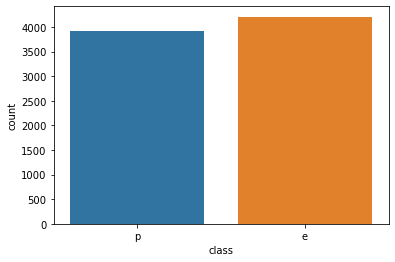

In [4]:
sns.countplot(data=df,x='class')
plt.show()

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


### X & y

In [7]:
X = pd.get_dummies(df.drop('class',axis=1),drop_first=True)
y = df['class']

In [8]:
X

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


### Train|Test Split

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [10]:
accuracies = dict()

### Modelling
#### AdaBoost Classifier with default parameters

In [11]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train,y_train)

# Prediction
ypred_train = model.predict(X_train)
predictions = model.predict(X_test)

#Evaluation
#Accuracy
from sklearn.metrics import accuracy_score
accuracies['AdaBoost'] = accuracy_score(y_test,predictions)
print("Train accuracy:",accuracy_score(y_train,ypred_train))
print("Test accuracy:",accuracy_score(y_test,predictions))


Train accuracy: 1.0
Test accuracy: 1.0


### Confusion Matrix

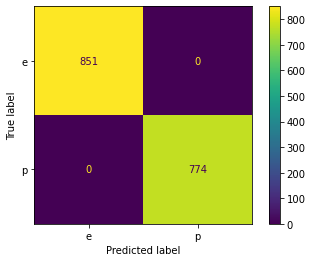

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test)
plt.show()

#### Classification Report

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       851
           p       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



#### Cross Validation Score

In [14]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,X,y,cv=5)
print("Cross Validation Score:",scores.mean())

Cross Validation Score: 0.9251425539977264


#### Importance of each feature given by this model

In [15]:
model.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  ,
       0.02, 0.  , 0.  , 0.  , 0.02, 0.  , 0.04, 0.04, 0.04, 0.  , 0.  ,
       0.04, 0.02, 0.  , 0.  , 0.  , 0.12, 0.08, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.04, 0.  , 0.18, 0.  , 0.08, 0.  , 0.  , 0.06,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02])

In [16]:
f_imp = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])
f_imp[f_imp['Feature Importance'] > 0]

,Feature Importance
cap-color_c,0.02
cap-color_n,0.02
cap-color_w,0.02
bruises_t,0.04
odor_c,0.04
odor_f,0.04
odor_n,0.04
odor_p,0.02
gill-spacing_w,0.12
gill-size_n,0.08


### Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV
estimator = AdaBoostClassifier()
param_grid = {"n_estimators":list(range(1,101))}
grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'n_estimators': 20}

### Final Model

In [20]:
final_model = AdaBoostClassifier(n_estimators=20)
final_model.fit(X_train,y_train)

preds_train = final_model.predict(X_train)
preds_test = final_model.predict(X_test)
accuracies['AdaBoost'] = accuracy_score(y_test,preds_test)
print("Train accuracy:",accuracy_score(y_train,preds_train))
print("Test accuracy:",accuracy_score(y_test,preds_test))


Train accuracy: 1.0
Test accuracy: 1.0


In [21]:
final_model.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.05, 0.05, 0.05, 0.  , 0.  ,
       0.1 , 0.05, 0.  , 0.  , 0.  , 0.05, 0.15, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.05, 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.05, 0.  , 0.1 , 0.  , 0.05, 0.  , 0.  , 0.1 ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [22]:
feats = pd.DataFrame(index=X.columns,data=final_model.feature_importances_,columns=['Feature Importance'])
feats

,Feature Importance
cap-shape_c,0.0
cap-shape_f,0.0
cap-shape_k,0.0
cap-shape_s,0.0
cap-shape_x,0.0
...,...
habitat_l,0.0
habitat_m,0.0
habitat_p,0.0
habitat_u,0.0


In [23]:
imp_feats = feats[feats['Feature Importance']>0]
imp_feats.sort_values("Feature Importance")

,Feature Importance
cap-color_w,0.05
bruises_t,0.05
odor_c,0.05
odor_f,0.05
odor_p,0.05
gill-spacing_w,0.05
stalk-surface-above-ring_k,0.05
stalk-surface-below-ring_y,0.05
stalk-color-below-ring_n,0.05
spore-print-color_r,0.05


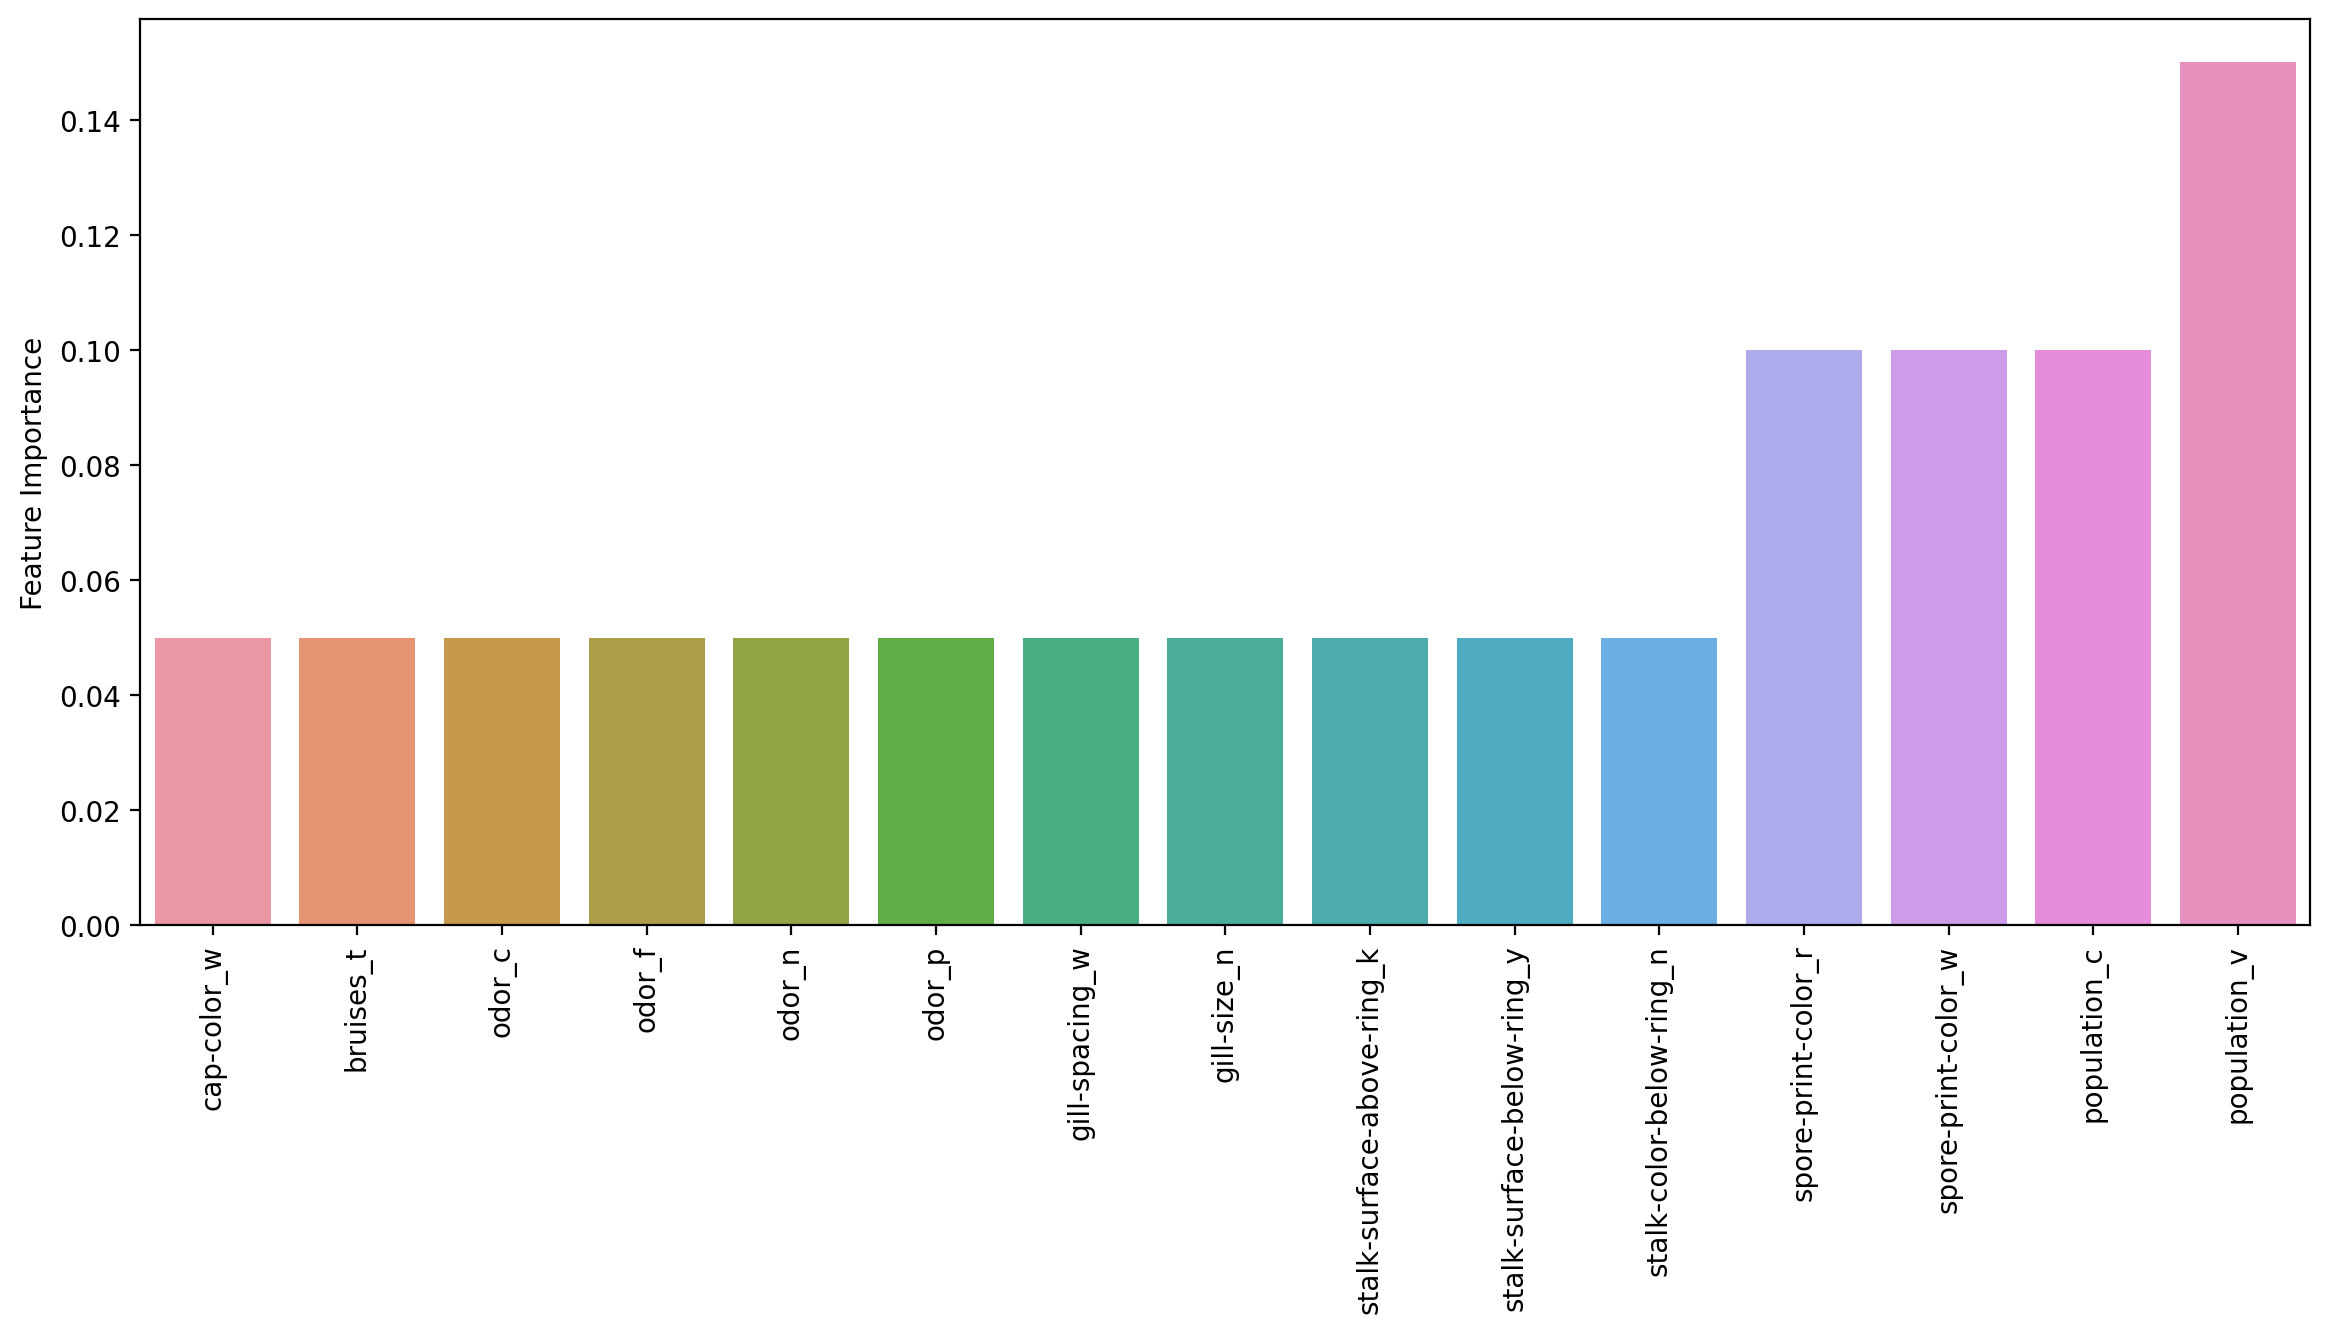

In [24]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.index,y='Feature Importance')

plt.xticks(rotation=90)
plt.show()

### Gradient Boosting
#### With default parameters

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

# Prediction
ypred_train = gb_model.predict(X_train)
predictions = gb_model.predict(X_test)

#Evaluation
#Accuracy
from sklearn.metrics import accuracy_score
accuracies['Gradient Boosting'] = accuracy_score(y_test,predictions)
print("Train accuracy:",accuracy_score(y_train,ypred_train))
print("Test accuracy:",accuracy_score(y_test,predictions))


Train accuracy: 0.9996922603477458
Test accuracy: 0.9993846153846154


#### With Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV
estimator = GradientBoostingClassifier()
param_grid = {"n_estimators":[1,5,10,20,40,100],"learning_rate":[0.1,0.2,0.3,0.5,0.8,1]}
grid = GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'learning_rate': 0.5, 'n_estimators': 100}

### Final Model

In [27]:
final_model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.5)
final_model.fit(X_train,y_train)

preds_train = final_model.predict(X_train)
preds_test = final_model.predict(X_test)
accuracies['Gradient Boosting'] = accuracy_score(y_test,preds_test)
print("Train accuracy:",accuracy_score(y_train,preds_train))
print("Test accuracy:",accuracy_score(y_test,preds_test))

Train accuracy: 1.0
Test accuracy: 1.0


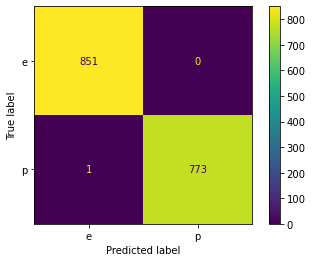

In [30]:
### Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
print(plot_confusion_matrix(gb_model,X_test,y_test))
plt.show()

In [31]:
### Cross Validation Score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gb_model,X,y,cv=5)
print("Cross Validation Score:",scores.mean())

Cross Validation Score: 0.9192312239484653


### Feature Importance

In [32]:
final_model.feature_importances_

array([ 8.13839042e-05,  6.76747091e-17,  5.85010059e-24,  1.61373482e-12,
        0.00000000e+00,  1.27233838e-03,  9.39652988e-06,  3.91343964e-05,
        2.15480040e-07,  0.00000000e+00,  0.00000000e+00,  2.55353020e-17,
        2.32090172e-26, -8.36863603e-30,  0.00000000e+00,  2.66271709e-07,
        2.19674453e-03,  4.94575028e-02,  1.87120531e-04,  3.47256387e-03,
        1.85991375e-02,  2.08273453e-06,  6.29492818e-01,  1.09158825e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.37953151e-03,
        5.07922020e-03,  0.00000000e+00,  0.00000000e+00,  2.60082836e-17,
        0.00000000e+00,  4.92344466e-20,  0.00000000e+00,  0.00000000e+00,
       -9.14078218e-25,  1.96453731e-27, -2.24465602e-21,  3.20266682e-18,
        7.56949893e-07,  8.84427764e-06,  1.35953462e-01,  0.00000000e+00,
        1.64557308e-03,  1.00126823e-03,  2.50499374e-06,  1.14202081e-05,
        1.61307480e-05,  2.22757610e-10,  6.97944359e-02,  0.00000000e+00,
        0.00000000e+00,  

In [33]:
imp_feats = pd.DataFrame(index=X.columns,data=grid.best_estimator_.feature_importances_,columns=['Importance'])
imp_feats

,Importance
cap-shape_c,1.400108e-04
cap-shape_f,6.735129e-19
cap-shape_k,6.247269e-18
cap-shape_s,5.241999e-12
cap-shape_x,2.938606e-18
...,...
habitat_l,8.963725e-04
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,5.919770e-08


In [34]:
imp_feats = imp_feats[imp_feats['Importance']>0.01]

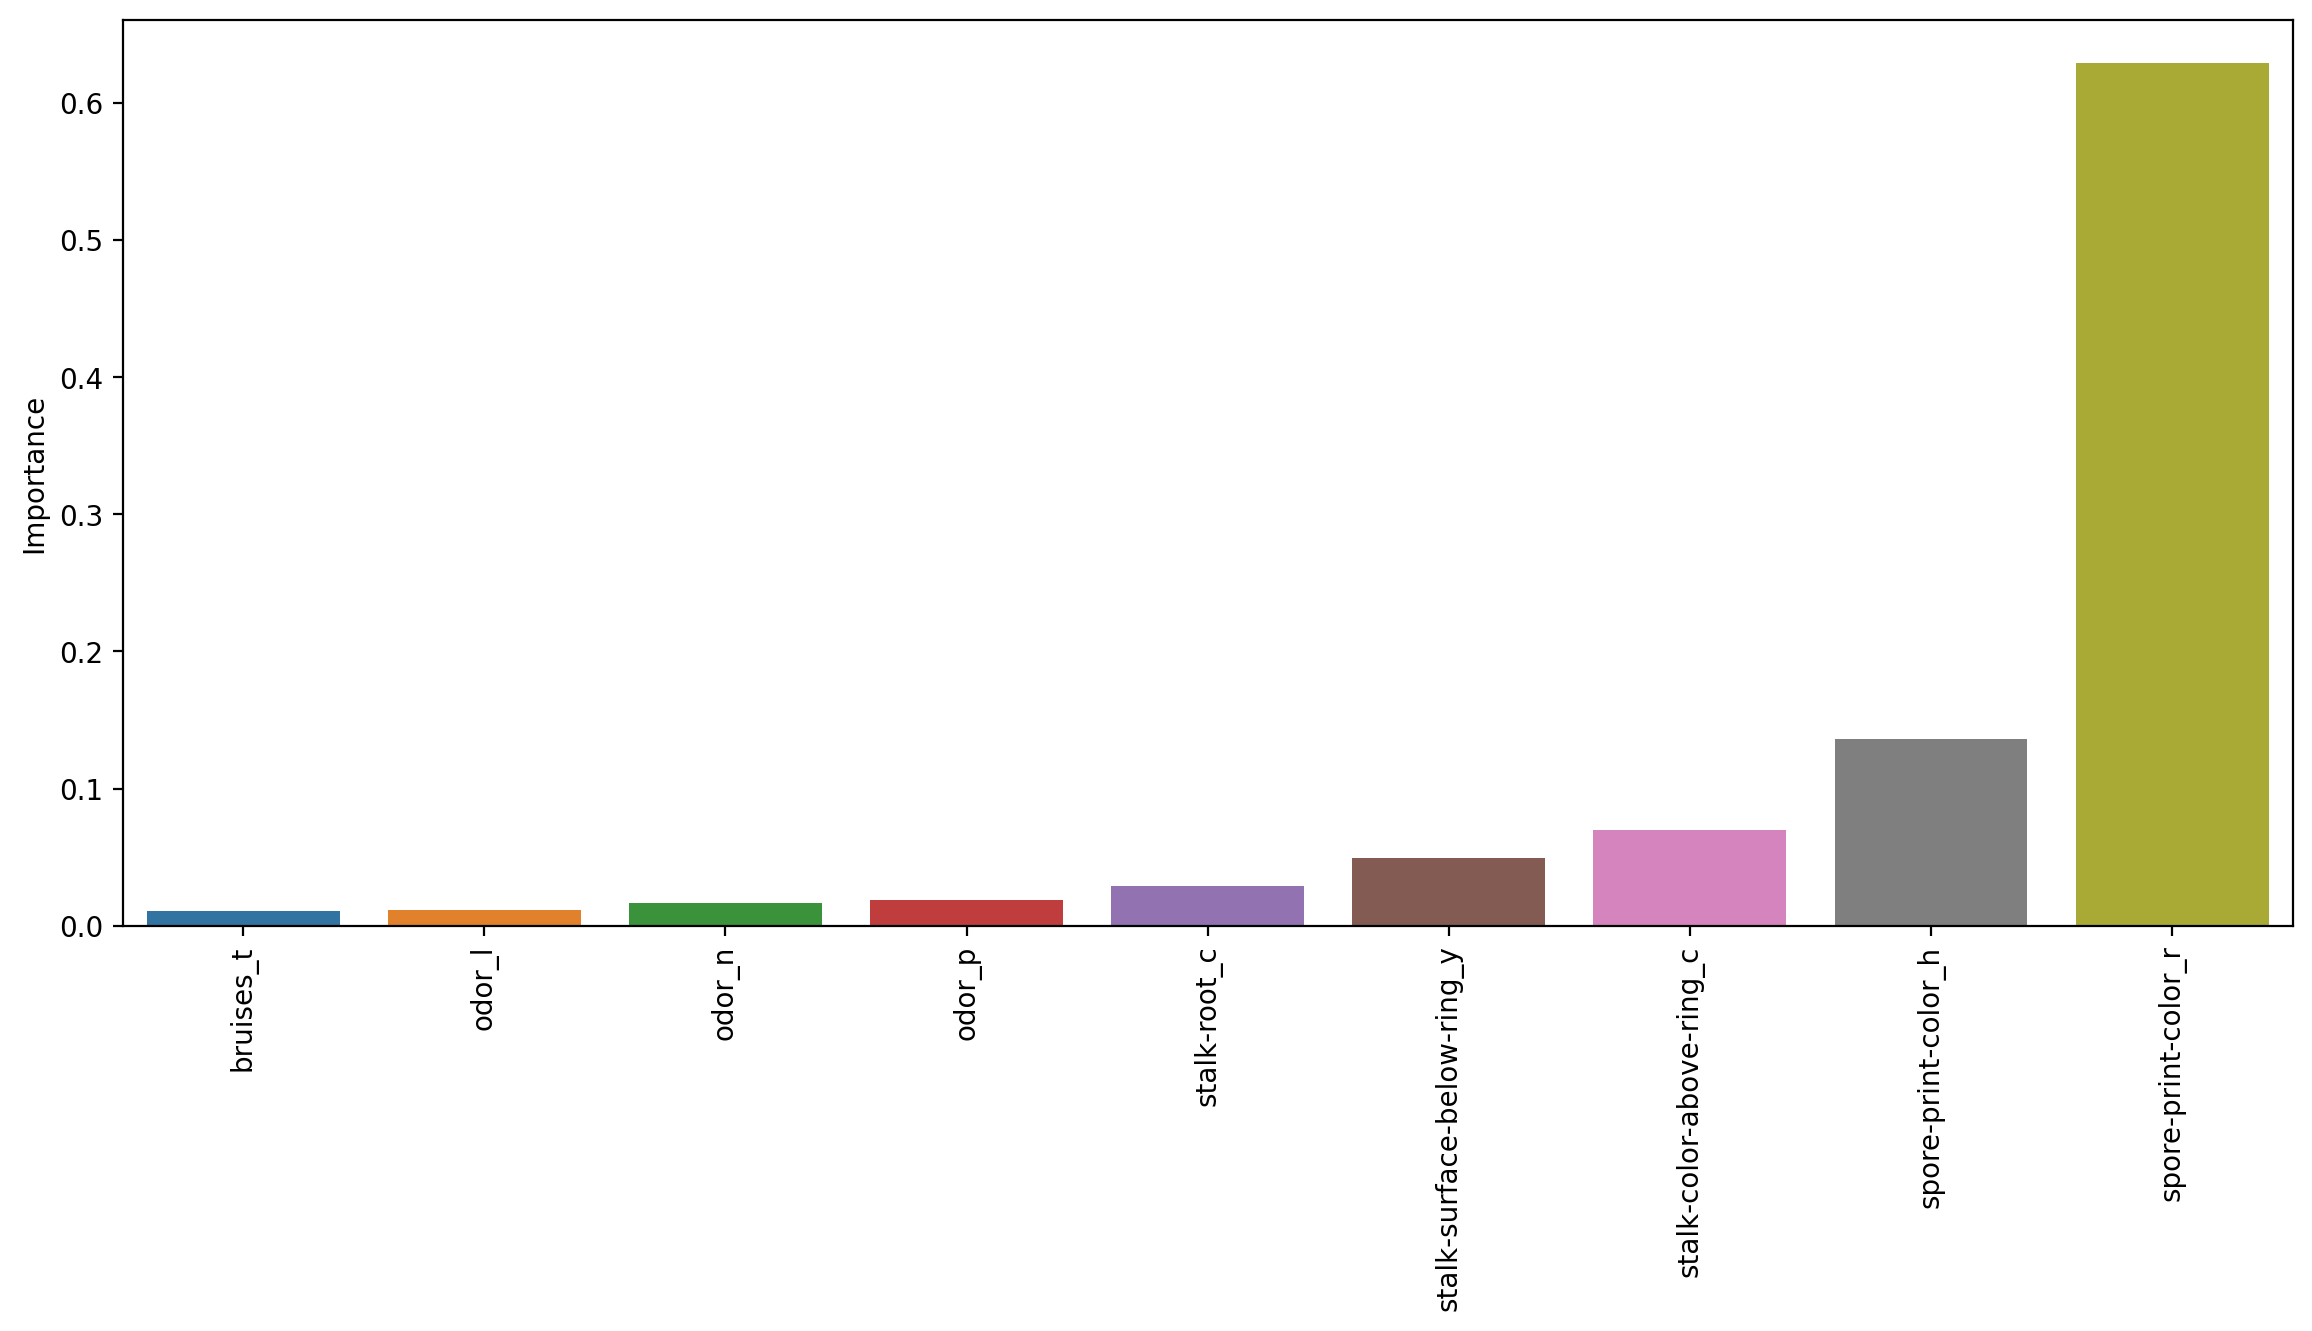

In [36]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')

plt.xticks(rotation=90)
plt.show()